# __Laboratorio 1. Ciencia Computacional Intermedia__

Tenga en cuenta lo siguiente:

*    La actividad puede realizarse en grupos máximo de 4 personas.
*    En cada problema encuentre las probabilidades utilizando la simulación del experimento aleatorio.
*    En todas las simulaciones deben realizarse la gráfica de la serie de tiempo que muestra el cambio de la probabilidad estimada en la medida que se aumentan el número de repeticiones.
*    En los problemas relacionados con probabilidad geométrica deben visualizarse las áreas involucradas.


# __Simulación experimentos aleatorios__


## __1. Dividiendo el grupo__#

Un grupo de 40 estudiantes está conformado por 20 hombres y 20 mujeres. Si se divide el grupo en dos grupos iguales.¿Cuál es la probabilidad de que cada grupo tenga el mismo número de hombres que de mujeres?

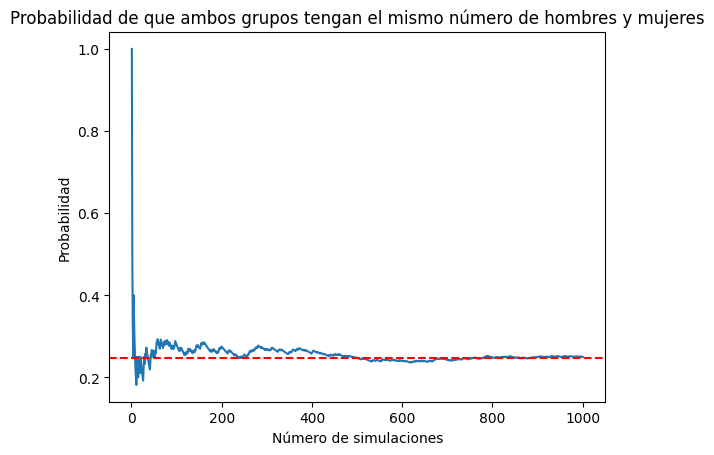

Probabilidad estimada = 0.25
Probabilidad teórica = 0.24762886543609086


In [ ]:
# Simulación
import random
import matplotlib.pyplot as plt
from math import comb

num_simulaciones = 1000
num_estudiantes = 40
num_hombres = 20
num_mujeres = 20
exito = 0
probabilidades = []

num_formas_dividir = comb(num_estudiantes, num_estudiantes // 2)
num_formas_mismo_numero = comb(num_hombres, num_hombres // 2) * comb(num_mujeres, num_mujeres // 2)
probabilidad_teorica = num_formas_mismo_numero / num_formas_dividir

for _ in range(num_simulaciones):
    estudiantes = random.sample(['H'] * num_hombres + ['M'] * num_mujeres, num_estudiantes)
    hombres_grupo1 = estudiantes[:num_estudiantes // 2].count('H')
    hombres_grupo2 = estudiantes[num_estudiantes // 2:].count('H')
    if hombres_grupo1 == hombres_grupo2:
        exito += 1
    probabilidad = exito / (len(probabilidades) + 1)
    probabilidades.append(probabilidad)

plt.plot(range(1, num_simulaciones + 1), probabilidades)
plt.axhline(probabilidad_teorica, color='red', linestyle='dashed', label='Teórica')
plt.xlabel('Número de simulaciones')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de que ambos grupos tengan el mismo número de hombres y mujeres')
plt.show()

print('Probabilidad estimada =', probabilidades[-1])
print('Probabilidad teórica =', probabilidad_teorica)


## __2. Ecuación cuadrática__#

Los coeficientes $a,b$ y $c$ de la ecuación cuadrática $ax^2+bx+c = 0$ son determinados lanzando un dado corriente tres veces consecutivas. ¿A qué es igual la probabilidad de que las dos raices de la ecuación sean reales?

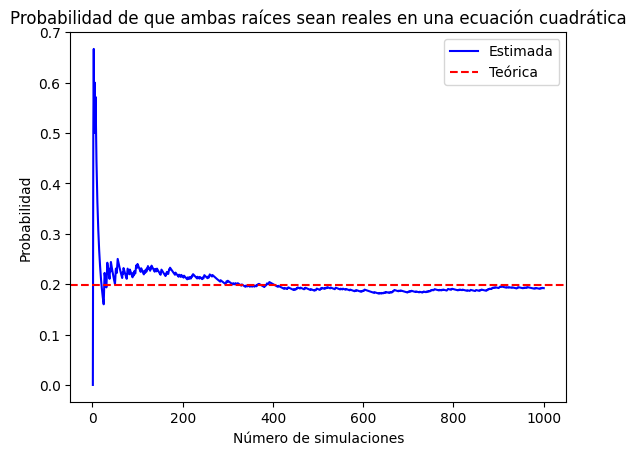

Probabilidad estimada = 0.192
Probabilidad teórica = 0.19907407407407407


In [ ]:
# Simulación
import random
import matplotlib.pyplot as plt

num_simulaciones = 1000
exito = 0
probabilidades = []

def discriminante_mayor_o_igual_a_cero(a, b, c):
    discriminante = b**2 - 4*a*c
    return discriminante >= 0

for _ in range(num_simulaciones):
    a = random.randint(1, 6)
    b = random.randint(1, 6)
    c = random.randint(1, 6)

    if discriminante_mayor_o_igual_a_cero(a, b, c):
        exito += 1
    probabilidad = exito / (len(probabilidades) + 1)
    probabilidades.append(probabilidad)

num_combinaciones_cumplen = sum(1 for a in range(1, 7) for b in range(1, 7) for c in range(1, 7) if discriminante_mayor_o_igual_a_cero(a, b, c))
probabilidad_teorica = num_combinaciones_cumplen / (6**3)

plt.plot(range(1, num_simulaciones + 1), probabilidades, label='Estimada', color='blue')
plt.axhline(probabilidad_teorica, color='red', linestyle='dashed', label='Teórica')
plt.xlabel('Número de simulaciones')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de que ambas raíces sean reales en una ecuación cuadrática')
plt.legend()
plt.show()

print('Probabilidad estimada =', probabilidades[-1])
print('Probabilidad teórica =', probabilidad_teorica)


## __3. La paradoja del cumpleaños__#

¿A que es igual la probabilidad de que entre 25 personas por lo menos dos tengan cumpleaños el mismo día? Suponga que cada año tiene 365 días y que todos los días tienen la misma probabilidad de ser un día de cumpleaños

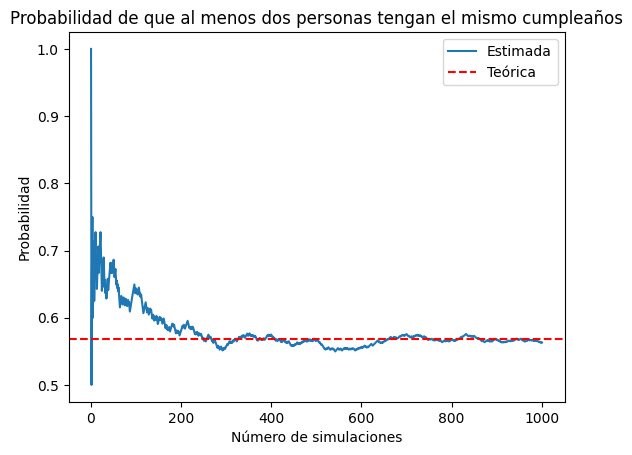

Probabilidad estimada = 0.563
Probabilidad teórica = 0.568699703969464


In [ ]:
import random
import matplotlib.pyplot as plt

num_simulaciones = 1000
num_personas = 25
dias_del_anio = 365
exito = 0
probabilidades = []

# Cálculo de la probabilidad teórica
probabilidad_teorica = 1.0  # Inicializar con 1.0 (100%)
for i in range(num_personas):
    probabilidad_teorica *= (dias_del_anio - i) / dias_del_anio
probabilidad_teorica = 1 - probabilidad_teorica

for _ in range(num_simulaciones):
    cumpleanos = [random.randint(1, dias_del_anio) for _ in range(num_personas)]
    if len(cumpleanos) != len(set(cumpleanos)):
        exito += 1
    probabilidad = exito / (len(probabilidades) + 1)
    probabilidades.append(probabilidad)

plt.plot(range(1, num_simulaciones + 1), probabilidades, label='Estimada')
plt.axhline(probabilidad_teorica, color='red', linestyle='dashed', label='Teórica')
plt.xlabel('Número de simulaciones')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de que al menos dos personas tengan el mismo cumpleaños')
plt.legend()
plt.show()

print('Probabilidad estimada =', probabilidades[-1])
print('Probabilidad teórica =', probabilidad_teorica)


# __Probabilidad geométrica__

Para caca uno de los siguientes problemas encuentre las probabilidades utilizando un método analítico y mediante simulación. Compare los resultados obtenidos por ambos métodos.

## __4.  Lanzando dardos__

Un dardo se lanza a un tablero circular con un radio de 1 metro. Si sabemos que todos los puntos al interior del círculo tienen la misma probabilidad de recibir el dardo y que el lanzador siempre acierta en algun punto del círulo. Cacule la probabilidad de que el dardo esté más cerca del centro que de la circunferencia círculo.

Probabilidad estimada = 0.2474
2474
7526


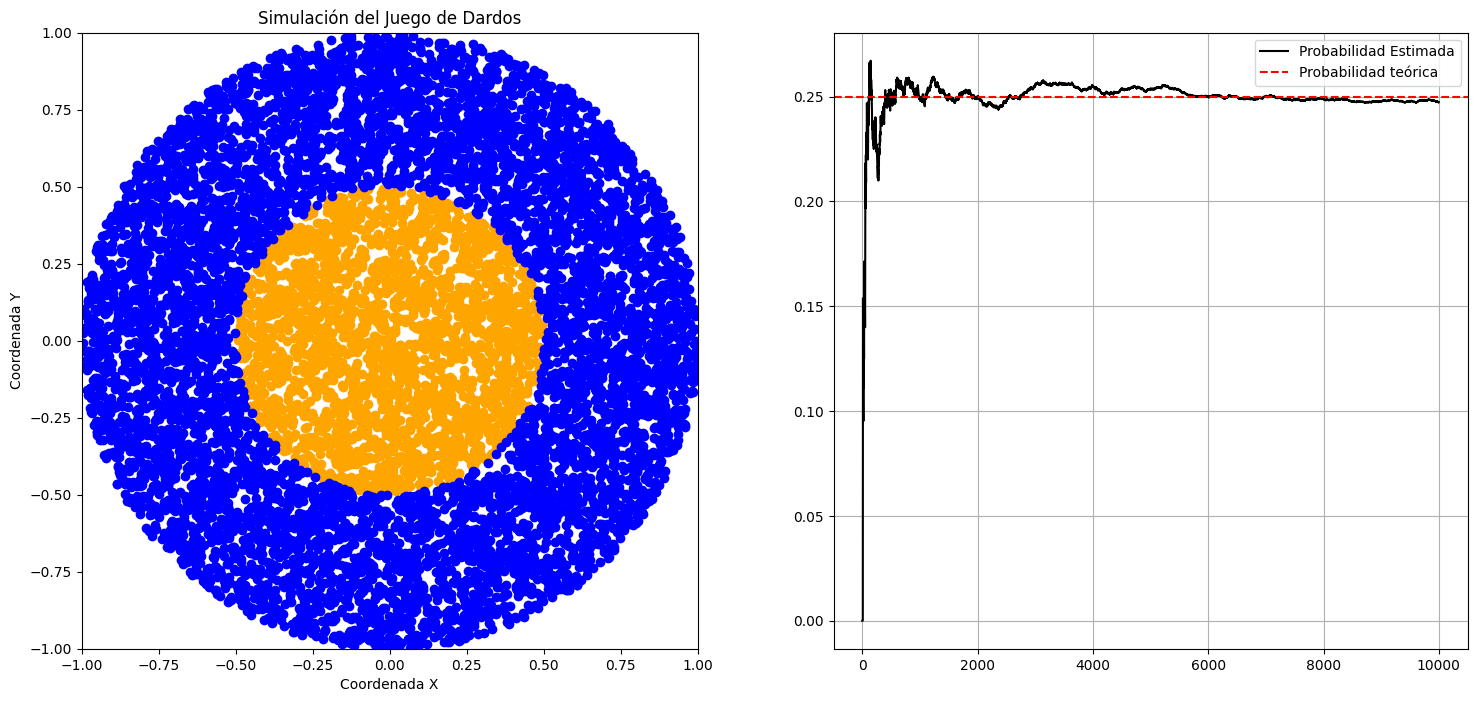

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def main():
    n = 10000
    radio_total = 1.0
    radio_gana = 0.5

    exitos = 0
    perdida = 0
    datos_gana = []
    datos_pierde = []

    serie_tiempo = []

    i=0

    while(i<n):
        x = np.random.uniform(-radio_total, radio_total)
        y = np.random.uniform(-radio_total, radio_total)

        distancia_al_centro = np.sqrt(x**2 + y**2)

        if distancia_al_centro <= radio_total:
          i+=1
          if distancia_al_centro <= radio_gana:
              exitos += 1
              datos_gana.append((x, y))
          else:
              perdida += 1
              datos_pierde.append((x, y))

          serie_tiempo.append(exitos / (i + 1))

    probabilidad_estimada = exitos / (exitos+perdida)
    print('Probabilidad estimada =', probabilidad_estimada)
    print(exitos)
    print(perdida)

    # Gráfica
    plt.figure(figsize=(18, 8))
    plt.subplot(1, 2, 1)
    datos_gana_x = [x for x, _ in datos_gana]
    datos_gana_y = [y for _, y in datos_gana]
    plt.scatter(datos_gana_x, datos_gana_y, color='orange', label='Gana')

    datos_pierde_x = [x for x, _ in datos_pierde]
    datos_pierde_y = [y for _, y in datos_pierde]
    plt.scatter(datos_pierde_x, datos_pierde_y, color='blue', label='Pierde', marker='o')  # Cambiar el marcador a un círculo

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title('Simulación del Juego de Dardos')

    plt.subplot(1, 2, 2)
    plt.plot(range(n), serie_tiempo, color='black', label='Probabilidad Estimada')
    plt.axhline(y=0.25, linestyle='--', color='red', label='Probabilidad teórica')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    main()

## __5. Un tronco de madera__

Sobre un tronco de madera completamente recto y con una longitud de 1 metro se seleccionan de manera aleatoria dos puntos $x$ y $y$. Calcular la probabilidad de que $x$ esté más cerca del extremo izquierdo que $y$

Probabilidad estimada: 0.5033


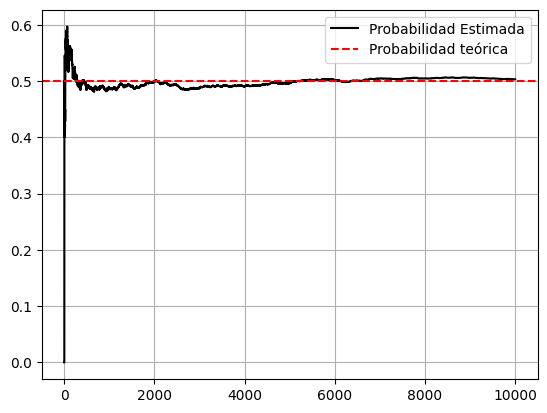

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


n = 10000
exitos = 0

lista_exitos = []
lista_fracasos = []

serie_tiempo = []

for i in range(n):
  x = np.random.uniform(0, 1)
  y = np.random.uniform(0, 1)
  if x < y:
    lista_exitos.append((x, y))
  else:
    lista_fracasos.append((x, y))

  serie_tiempo.append(len(lista_exitos) / (i + 1))


print('Probabilidad estimada:', len(lista_exitos) / n)

plt.plot(range(n), serie_tiempo, color='black', label='Probabilidad Estimada')
plt.axhline(y=0.50, linestyle='--', color='red', label='Probabilidad teórica')
plt.legend()
plt.grid()
plt.show()


## __6. Área de un triangulo__

Suponga que se selecciona un punto al azar en el cuadrado $[0,1]×[0,1]$. ¿ A qué es igual la probabilidad de que el punto seleccionado esté en el triangulo acotado por $x=0$, $y=0$ y $x+y=1$?

Probabilidad estimada: 0.5007


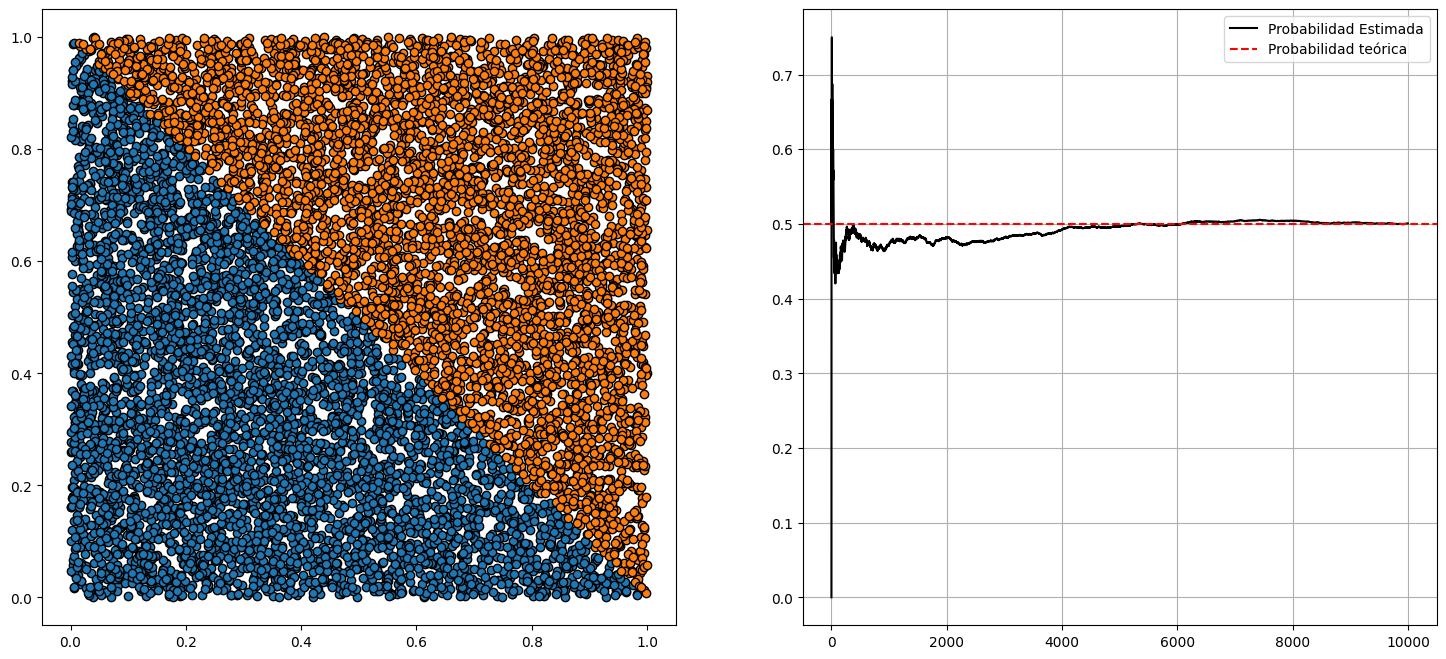

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


n = 10000
exitos = 0

lista_exitos = []
lista_fracasos = []

serie_tiempo = []

for i in range(n):
  x = np.random.uniform(0, 1)
  y = np.random.uniform(0, 1)
  if 1-x>=  y:
    lista_exitos.append((x, y))
  else:
    lista_fracasos.append((x, y))

  serie_tiempo.append(len(lista_exitos) / (i + 1))


print('Probabilidad estimada:', len(lista_exitos) / n)


plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.scatter([x for x, _ in lista_exitos], [y for _, y in lista_exitos], edgecolor='black')
plt.scatter([x for x, _ in lista_fracasos], [y for _, y in lista_fracasos], edgecolor='black')

plt.subplot(1, 2, 2)
plt.plot(range(n), serie_tiempo, color='black', label='Probabilidad Estimada')
plt.axhline(y=0.50, linestyle='--', color='red', label='Probabilidad teórica')
plt.legend()
plt.grid()
plt.show()